To load the most data set, use keras.datasets.mnist and store it into a variable. With that variable, extract the training and test data using load_data(). The dataset is structured as a tuple of NumPy arrays: x training images, y training labels, and x test images, y test labels.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

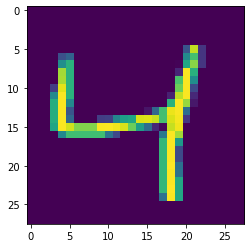

In [2]:
plt.imshow(x_train_full[2])

In [6]:
x_train_norm = x_train_full/255
x_test_norm = x_test/255


x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_norm

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [11]:
model.history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))
model.evaluate(x_test, y_test)

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.6196 - accuracy: 0.8405 - val_loss: 0.3103 - val_accuracy: 0.9120
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2953 - accuracy: 0.9151 - val_loss: 0.2472 - val_accuracy: 0.9304
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2430 - accuracy: 0.9303 - val_loss: 0.2060 - val_accuracy: 0.9428
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2076 - accuracy: 0.9407 - val_loss: 0.1823 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1811 - accuracy: 0.9485 - val_loss: 0.1644 - val_accuracy: 0.9536
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1603 - accuracy: 0.9543 - val_loss: 0.1483 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1431 - accuracy: 0.9598 - val_loss: 0.1366 - val_accuracy:

[2.391866683959961, 0.08919999748468399]

In [12]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)

In [14]:
y_probability.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_predict = model.predict_classes(x_sample)
y_predict

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 5, 5, 5, 5], dtype=int64)